In [44]:
import os
import json
import pandas as pd

data_path = r'.\Data'

# Initialize an empty list to store parsed JSON data
all_data = []

# Iterate over files in the directory
for file_name in os.listdir(data_path):
    # Construct full file path
    file_path = os.path.join(data_path, file_name)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Open and read the file
        with open(file_path) as f:
            # Load JSON data from the file
            json_data = json.load(f)
            # Append loaded data to the list
            all_data.append(json_data)

# Normalize the JSON data
data_normalized = pd.json_normalize(all_data, 'data')

# Now you can work with your DataFrame 'data_normalized'
data_normalized

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
2,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


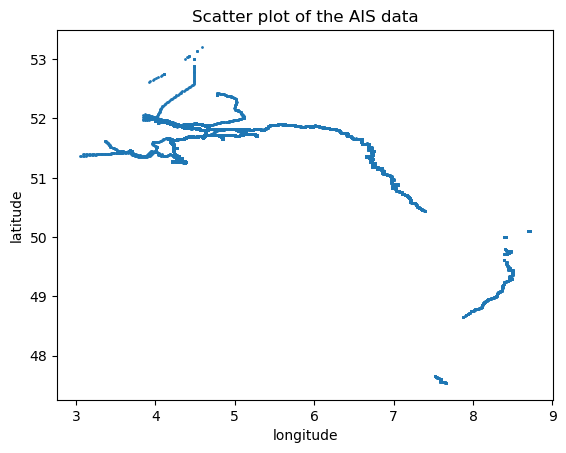

In [39]:
# make a scatter plot of the data (latitude vs longitude)
import matplotlib.pyplot as plt

plt.scatter(data_normalized['navigation.location.long'], data_normalized['navigation.location.lat'], s=1)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Scatter plot of the AIS data')
plt.show()

In [40]:
# make a function which filteres the data frame with the last response of each vessel with time as input

def filter_last_response(data, time):
    time = pd.to_datetime(time)
    # Filter the data with the last response of each vessel within the specified time window
    
    data['navigation.time'] = pd.to_datetime(data['navigation.time'])
    
    data_filtered = data[(data['navigation.time'] <= time) & (data['navigation.time'] >= time - pd.Timedelta(minutes=10))]
    
    # Sort the data by time and drop duplicates to keep only the last response of each vessel
    data_filtered = data_filtered.sort_values('navigation.time').drop_duplicates('vessel.callsign', keep='last')
    
    return data_filtered

filter_last_response(data_normalized, '2021-01-31T23:46:57+00:00')

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
79145,2.0,2021-01-31 23:41:35+00:00,0.0,NaN,4.26774,51.50294,212.8,RDAM-BERGEN OP ZOOM,None,moored,2,86,0,8,244670295,PF8141,None,other,0,ROMEE
78591,2.5,2021-01-31 23:44:16+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M
77772,4.1,2021-01-31 23:45:44+00:00,0.0,159.0,4.61053,51.69481,0.1,NLMOE,2021-01-31T06:00:00+00:00,moored,9,76,14,4,309937000,C6WS3,None,cargo,9073581,SUNMI
78871,2.6,2021-01-31 23:45:51+00:00,0.0,66.0,4.42495,51.69705,25.6,BASEL,2021-11-16T15:05:00+00:00,moored,5,120,15,6,244650759,PC5409,None,cargo,0,HELENA
79435,1.9,2021-01-31 23:46:45+00:00,0.0,NaN,4.17060,51.66415,134.2,KRAMMERSLUIS,None,undefined,12,59,5,4,244700680,PD4219,None,dredging-underwater-ops,0,WESTERSCHELDE
77958,1.8,2021-01-31 23:46:47+00:00,11.1,NaN,6.68372,51.57203,326.6,ROTTERDAM,2021-02-01T11:59:00+00:00,under-way-using-engine,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
79723,1.5,2021-01-31 23:46:50+00:00,0.0,NaN,4.36234,51.25319,NaN,ARA VERKEER,2021-01-18T23:14:00+00:00,fishing,11,135,0,1,244700820,PB8188,all,tanker,0,CHARLOIS
78180,0.0,2021-01-31 23:46:57+00:00,0.0,NaN,4.01085,51.95823,90.1,OCT -- EUROPOORT VV,2021-10-10T00:00:00+00:00,under-way-using-engine,4,74,12,7,244010773,PF3820,None,cargo,0,LEVANTE
77534,15.5,2021-01-31 23:46:57+00:00,0.0,216.0,4.00390,51.95580,216.0,EGSUC>NLROT,2021-01-29T12:30:00+00:00,moored,30,146,253,30,219019094,OWJJ2,hazardous-cat-a,cargo,9619969,MARIBO MAERSK
80011,0.0,2021-01-31 23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


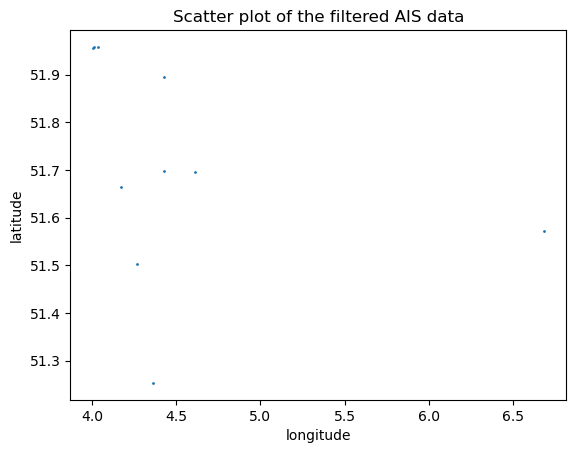

In [41]:
# make a scatter plot of the filtered data
data_filtered = filter_last_response(data_normalized, '2021-01-31T23:46:57+00:00')

plt.scatter(data_filtered['navigation.location.long'], data_filtered['navigation.location.lat'], s=1)  
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Scatter plot of the filtered AIS data')
plt.show()

Text(0, 0.5, 'number of ships')

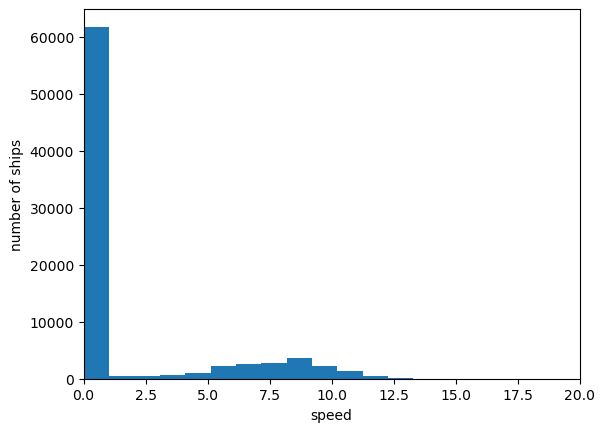

In [42]:
# make a graph of the speed of all ships
plt.hist(data_normalized['navigation.speed'], bins=100)
plt.xlim(0, 20)

# set x-axis label
plt.xlabel('speed')

# set y-axis label
plt.ylabel('number of ships')

<Axes: >

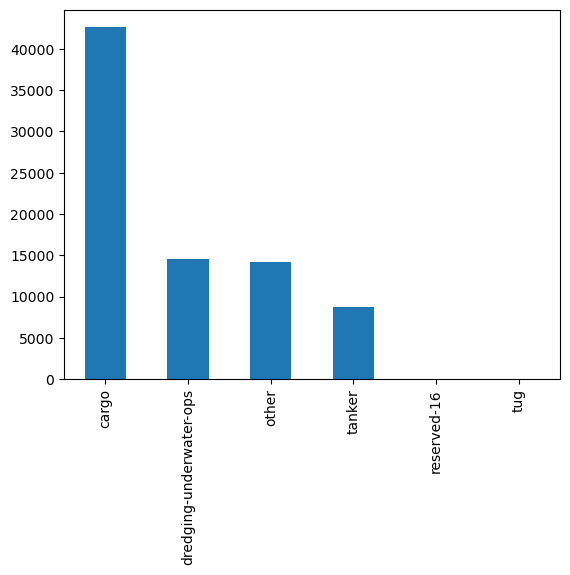

In [43]:
# make a plot of all types of ships
data_normalized['vessel.type'].value_counts().plot(kind='bar')